## Домашнее задание 2. Реализация обучения диффузионной модели

###Цель домашнего занятия
Научиться реализовывать обучение диффузии под датасет и решить задачу Image Inpainting

### [6 баллов] Дообучение диффузионной модели.

В этом задании вам предстоит обучить диффузионную модель для решения задачи text-to-image. В предыдущем задании вы уже обучали диффузионную модель, но она была unconditional, то есть генерировала без каких-либо условий. В этот раз вам предлагается обучить свою text-to-image модель на датасете https://huggingface.co/datasets/Norod78/cartoon-blip-captions или на другом понравившемся датасете

---

В этой части задания вам рекомендуется взять код с семинара 4 и адаптировать его под обучение на новом датасете, с учетом того, что в нем содержаться картинки

**Ожидаемый результат.** В качестве результатов модели, от вас требуется предоставить визуализации генераций, полученных от вашей модели и код обучения модели, а также визуальное сравнение качества моделей до и после дообучения. Если не получится дообучить, то можно провести сравнение уже обученных адаптеров (3 балла).

NameError: ignored

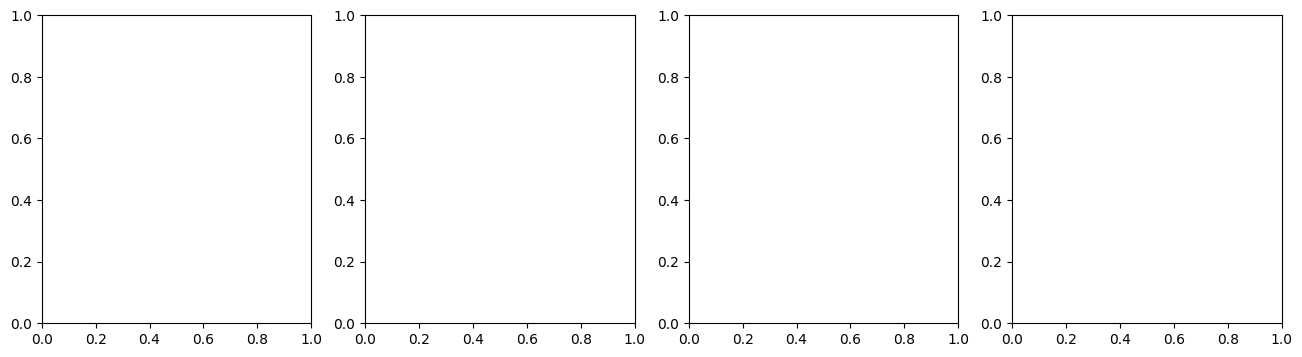

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, image in enumerate(dataset[:4]["image"]):
    axs[i].imshow(image)
    axs[i].set_axis_off()
fig.show()

In [ ]:
#Код

In [ ]:
#Визулизации

### [4 балла] Image Inpainting
В первой части задания (2 балла) вам предстоит обучить диффузионную модель решать задачу image inpainting. Для этого вам необходимо модифицировать код из семинара 2 следующий образом:
- Реализовать функцию генерации маски, можно использовать приведенную ниже или реализовать свою.
- Добавить в UNet новых 4 канала, куда подавать замаскированное изображение и маску.
- Запустить обучение.

---

**Ожидаемый результат.** В качестве результатов модели, от вас требуется предоставить визуализации генераций, полученных от вашей модели и код обучения модели.

In [ ]:
import numpy as np

class RectangleGenerator:
    """
    Generates for each object a mask where unobserved region is
    a rectangle which square divided by the image square is in
    interval [min_rect_rel_square, max_rect_rel_square].
    """
    def __init__(self, min_rect_rel_square=0.3, max_rect_rel_square=1):
        self.min_rect_rel_square = min_rect_rel_square
        self.max_rect_rel_square = max_rect_rel_square

    def gen_coordinates(self, width, height):
        x1, x2 = np.random.randint(0, width, 2)
        y1, y2 = np.random.randint(0, height, 2)
        x1, x2 = min(x1, x2), max(x1, x2)
        y1, y2 = min(y1, y2), max(y1, y2)
        return int(x1), int(y1), int(x2), int(y2)

    def __call__(self, batch):
        batch_size, num_channels, width, height = batch.shape
        mask = torch.zeros_like(batch)
        for i in range(batch_size):
            x1, y1, x2, y2 = self.gen_coordinates(width, height)
            sqr = width * height
            while not (self.min_rect_rel_square * sqr <=
                       (x2 - x1 + 1) * (y2 - y1 + 1) <=
                       self.max_rect_rel_square * sqr):
                x1, y1, x2, y2 = self.gen_coordinates(width, height)
            mask[i, :, x1: x2 + 1, y1: y2 + 1] = 1
        return mask

Во второй части задания (2 балла) вам предстоит провизуализировать результаты полученной модели inpainting и модели SD через [демо](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/in_painting_with_stable_diffusion_using_diffusers.ipynb#scrollTo=R596bpT2ynqV). Пример демо реализован ниже. Если у вас не получится реализовать модель из первого задания, то вы можете использовать модель SD и получите один балл

**Ожидаемый результат.** От вас ожидается анализ кейсов, когда модель отрабатывает хорошо (например, определенный тип масок), а когда плохо.

In [ ]:
# Визуализации